# Analyse Exploratoire du Catalogue Netflix

Ce projet vise à analyser le catalogue Netflix à partir d’un dataset réel
contenant 8 807 titres (films et séries).

Les objectifs sont :
- Comprendre la structure du dataset
- Explorer les types de contenus proposés
- Analyser la diversité géographique et générique
- Mettre en évidence des tendances temporelles
- Produire des visualisations statiques et interactives

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Pour les graphiques interactifs
import plotly.express as px

# Charger le dataset (séparateur virgule)
df = pd.read_csv("netflix_titles.csv")

df.head()


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


#  2. EXPLORATION DU DATASET

In [2]:
df.shape

(8807, 12)

Le dataset contient bien 8807 lignes et 12 collonnes.

In [3]:
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [10]:
# Infos générales : colonnes, types, nombre de valeurs nulles
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       8807 non-null   object        
 1   type          8807 non-null   object        
 2   title         8807 non-null   object        
 3   director      6173 non-null   object        
 4   cast          7982 non-null   object        
 5   country       7976 non-null   object        
 6   date_added    8709 non-null   datetime64[ns]
 7   release_year  8807 non-null   int64         
 8   rating        8803 non-null   object        
 9   duration      8804 non-null   object        
 10  listed_in     8807 non-null   object        
 11  description   8807 non-null   object        
 12  main_country  7976 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(11)
memory usage: 894.6+ KB


In [11]:
df.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        98
release_year       0
rating             4
duration           3
listed_in          0
description        0
main_country     831
dtype: int64

### Structure du dataset

Le dataset contient 8 807 titres et 12 colonnes.
Certaines colonnes comme `director`, `cast` et `country` contiennent des valeurs manquantes.
Cela s’explique par le fait que certains contenus n’ont pas de réalisateur ou de casting renseigné.


# 3. NETTOYAGE MINIMAL

In [12]:
df['main_country'] = df['country'].str.split(',').str[0]

In [13]:
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')
df['date_added'].dtype

dtype('<M8[ns]')

## Nettoyage des données

Un nettoyage minimal a été appliqué afin de rendre le dataset exploitable
sans altérer son contenu initial.

Tout d’abord, la colonne `date_added`, initialement stockée sous forme de texte,
a été convertie en format datetime. Cette conversion a nécessité l’utilisation
de l’option `errors='coerce'` afin de gérer les formats de dates hétérogènes et
les espaces inutiles présents dans certaines lignes. Les valeurs non valides
ont ainsi été transformées en valeurs manquantes (`NaT`).

Ensuite, afin de faciliter l’analyse géographique, une nouvelle colonne
`main_country` a été créée en conservant uniquement le premier pays mentionné
dans la colonne `country`. Cette simplification permet d’obtenir des
visualisations plus lisibles tout en conservant l’information originale.

# 4. ANALYSE DES CONTENUS

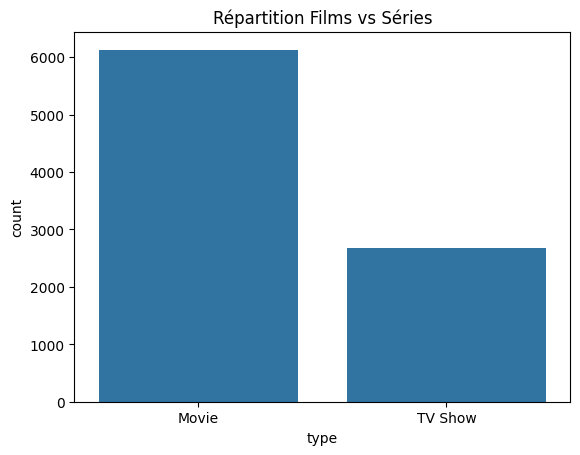

In [14]:
sns.countplot(data=df, x='type')
plt.title("Répartition Films vs Séries")
plt.show()

### Répartition des contenus

Le catalogue Netflix est majoritairement composé de films.
Les séries représentent cependant une part importante du catalogue,
ce qui montre l’investissement croissant de Netflix dans les contenus sériels.

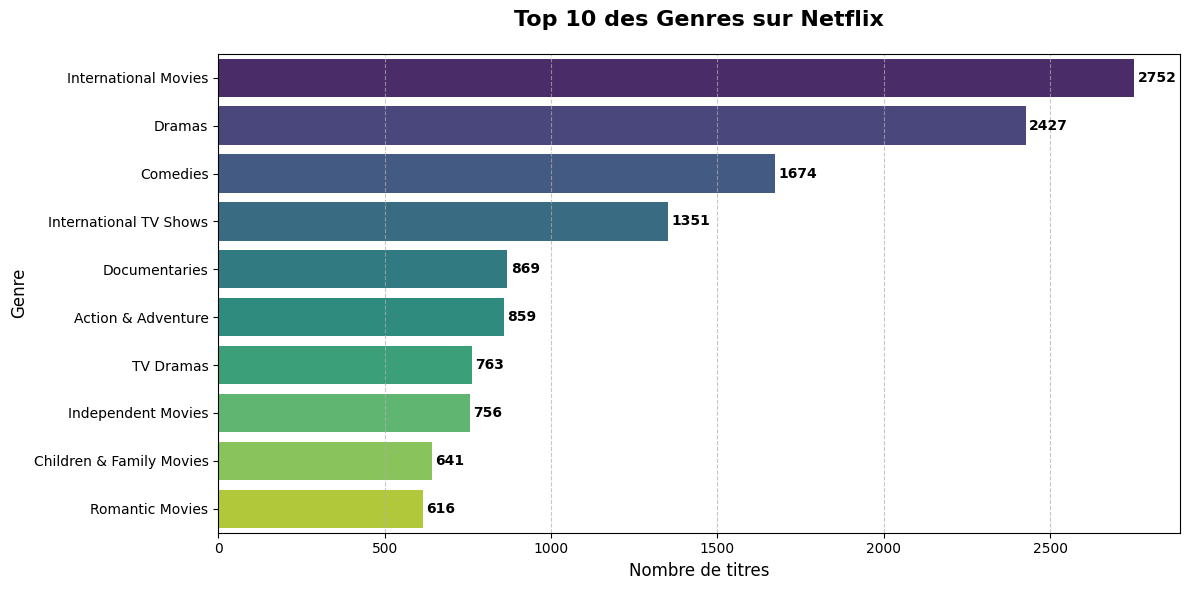

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

genres_exploded = df['listed_in'].str.split(', ').explode()

top_genres = genres_exploded.value_counts().head(10)

# 3. CRÉATION DU GRAPHIQUE
plt.figure(figsize=(12, 6))

ax = sns.barplot(x=top_genres.values, y=top_genres.index, palette="viridis", hue=top_genres.index, legend=False)

plt.title("Top 10 des Genres sur Netflix", fontsize=16, fontweight='bold', pad=20)
plt.xlabel("Nombre de titres", fontsize=12)
plt.ylabel("Genre", fontsize=12)

plt.grid(axis='x', linestyle='--', alpha=0.7)

for i, v in enumerate(top_genres.values):
    ax.text(v + 10, i, str(v), va='center', fontsize=10, fontweight='bold')

plt.tight_layout()
plt.show()

### Genres dominants

Les genres les plus représentés sont International Movies, les Dramas et Comedies.
Cela montre que Netflix privilégie des contenus grand public
et une offre diversifiée adaptée à un public international.

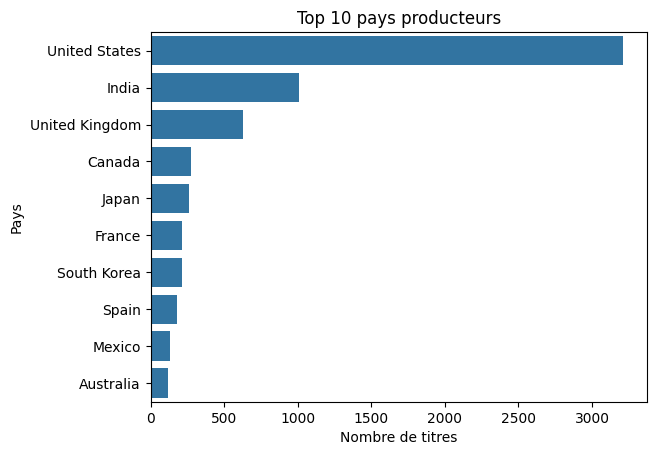

In [17]:
sns.barplot(
    y=df['main_country'].value_counts().head(10).index,
    x=df['main_country'].value_counts().head(10).values
)
plt.title("Top 10 pays producteurs")
plt.xlabel("Nombre de titres")
plt.ylabel("Pays")
plt.show()


### Répartition géographique

Les États-Unis sont largement dominants dans le catalogue Netflix.
Cependant, on observe également une forte présence de contenus provenant d’Inde,
du Royaume-Uni et du Canada, ce qui reflète une stratégie de diversification géographique.

In [18]:
directors = df['director'].dropna().str.split(', ').explode()
directors.value_counts().head(10)

director
Rajiv Chilaka          22
Jan Suter              21
Raúl Campos            19
Marcus Raboy           16
Suhas Kadav            16
Jay Karas              15
Cathy Garcia-Molina    13
Youssef Chahine        12
Martin Scorsese        12
Jay Chapman            12
Name: count, dtype: int64

In [19]:
actors = df['cast'].dropna().str.split(', ').explode()
actors.value_counts().head(10)

cast
Anupam Kher         43
Shah Rukh Khan      35
Julie Tejwani       33
Takahiro Sakurai    32
Naseeruddin Shah    32
Rupa Bhimani        31
Om Puri             30
Akshay Kumar        30
Yuki Kaji           29
Amitabh Bachchan    28
Name: count, dtype: int64

# 5. ANALYSE TEMPORELLE

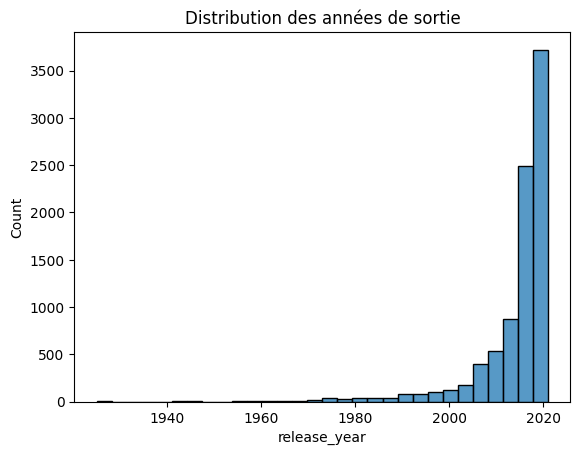

In [20]:
sns.histplot(df['release_year'], bins=30)
plt.title("Distribution des années de sortie")
plt.show()

### Années de sortie

La majorité des contenus disponibles ont été été produits après les années 2000.
On observe une forte concentration de titres récents,
ce qui montre la volonté de Netflix de proposer des contenus modernes.

In [21]:
df['year_added'] = df['date_added'].dt.year

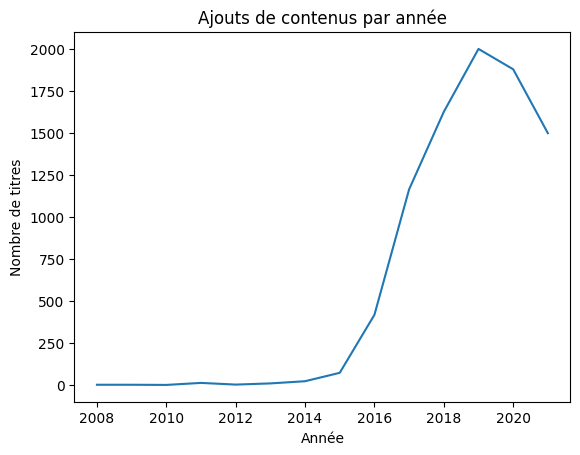

In [22]:
df['year_added'].value_counts().sort_index().plot(kind='line')
plt.title("Ajouts de contenus par année")
plt.xlabel("Année")
plt.ylabel("Nombre de titres")
plt.show()

### Ajouts de contenus

Le nombre de contenus ajoutés sur Netflix augmente fortement à partir de 2016.
Cette croissance correspond à l’expansion internationale de la plateforme
et à l’augmentation de la production de contenus originaux. De plus la baisse vers 2020 est surement liée au COVID 19.

# 6. VISUALISATIONS INTERACTIVES (PLOTLY)

In [23]:
country_counts = (
    df['main_country']
    .value_counts()
    .reset_index()
)

country_counts.columns = ['country', 'count']

fig = px.choropleth(
    country_counts,
    locations='country',
    locationmode='country names',
    color='count',
    color_continuous_scale='Blues',
    title='Nombre de contenus Netflix par pays'
)
fig.show()

C:\Users\matos\AppData\Local\Temp\ipykernel_26216\1159768898.py:9: DeprecationWarning: The library used by the *country names* `locationmode` option is changing in an upcoming version. Country names in existing plots may not work in the new version. To ensure consistent behavior, consider setting `locationmode` to *ISO-3*.
  fig = px.choropleth(


### Analyse de la répartition géographique

La carte met en évidence de fortes disparités dans la répartition géographique
des contenus Netflix selon les pays d’origine. Certains pays concentrent un
nombre élevé de titres, tandis que d’autres en comptent significativement moins.

Cette visualisation illustre le caractère international du catalogue Netflix,
tout en montrant que la production de contenus est concentrée dans un nombre
limité de pays. Elle permet ainsi de comparer visuellement les volumes de
contenus entre les différentes régions du monde.

In [24]:
fig = px.histogram(
    df,
    x="year_added",
    color="type",
    barmode="group",
    title="Ajouts de films vs séries par année"
)
fig.show()

## Synthèse des observations

- Le catalogue Netflix est majoritairement composé de films.
- Les États-Unis dominent largement la production de contenus.
- Les genres les plus répandus sont Dramas, Comedies et International TV Shows.
- La majorité des contenus ont été ajoutés après 2016.
- Netflix investit de plus en plus dans les séries ces dernières années.


# 6. ANALYSE AVANCÉE : CORRÉLATIONS ET TENDANCES


## Corrélation entre Genres et Pays Principaux
Nous allons analyser quels genres sont les plus produits par les principaux pays.


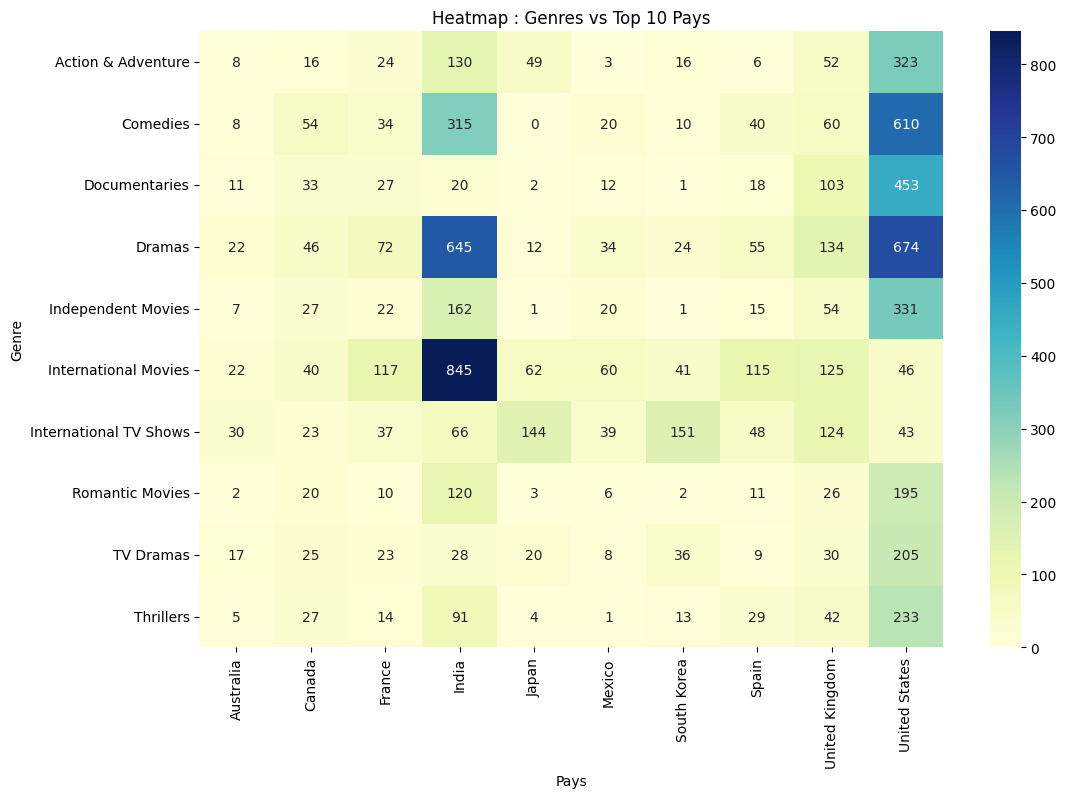

In [ ]:

# On explose la colonne 'listed_in' (genres) et on garde 'main_country'
df_genres_country = df[['main_country', 'listed_in']].dropna()
df_genres_country['listed_in'] = df_genres_country['listed_in'].str.split(', ')
df_exploded = df_genres_country.explode('listed_in')

# On sélectionne les top 10 pays et top 10 genres pour la lisibilité
top_countries = df['main_country'].value_counts().head(10).index
top_genres = df_exploded['listed_in'].value_counts().head(10).index

df_filtered = df_exploded[df_exploded['main_country'].isin(top_countries) & df_exploded['listed_in'].isin(top_genres)]

# Création de la table pivot
pivot_table = pd.crosstab(df_filtered['listed_in'], df_filtered['main_country'])

#Heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(pivot_table, annot=True, fmt='d', cmap='YlGnBu')
plt.title('Heatmap : Genres vs Top 10 Pays')
plt.ylabel('Genre')
plt.xlabel('Pays')
plt.show()



## Évolution du contenu ajouté par année


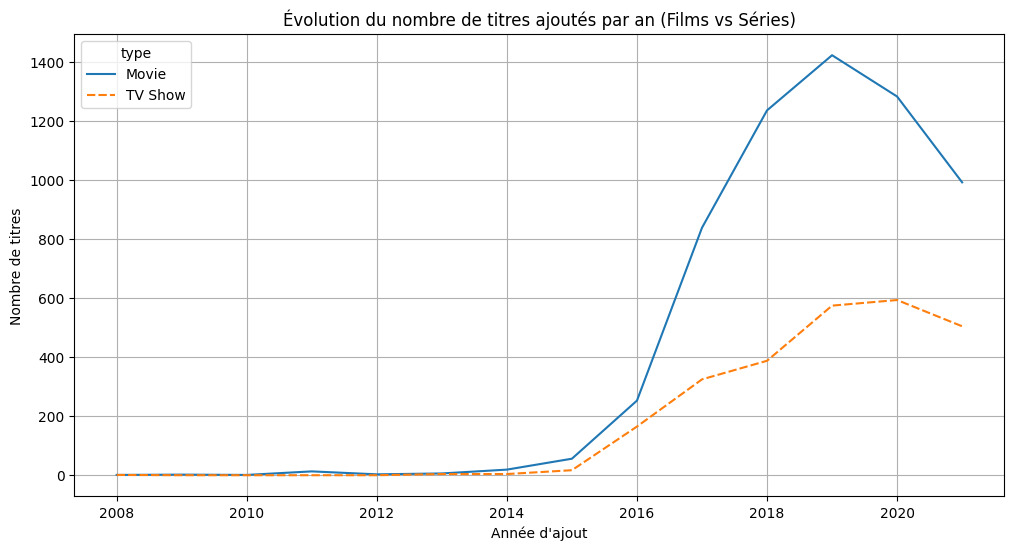

In [26]:

# Extraction de l'année d'ajout
df['year_added'] = df['date_added'].dt.year

# Comptage par année et type
content_by_year = df.groupby(['year_added', 'type']).size().unstack().fillna(0)

# Visualisation
plt.figure(figsize=(12, 6))
sns.lineplot(data=content_by_year)
plt.title("Évolution du nombre de titres ajoutés par an (Films vs Séries)")
plt.xlabel("Année d'ajout")
plt.ylabel("Nombre de titres")
plt.grid(True)
plt.show()



## Distribution de la durée des Films


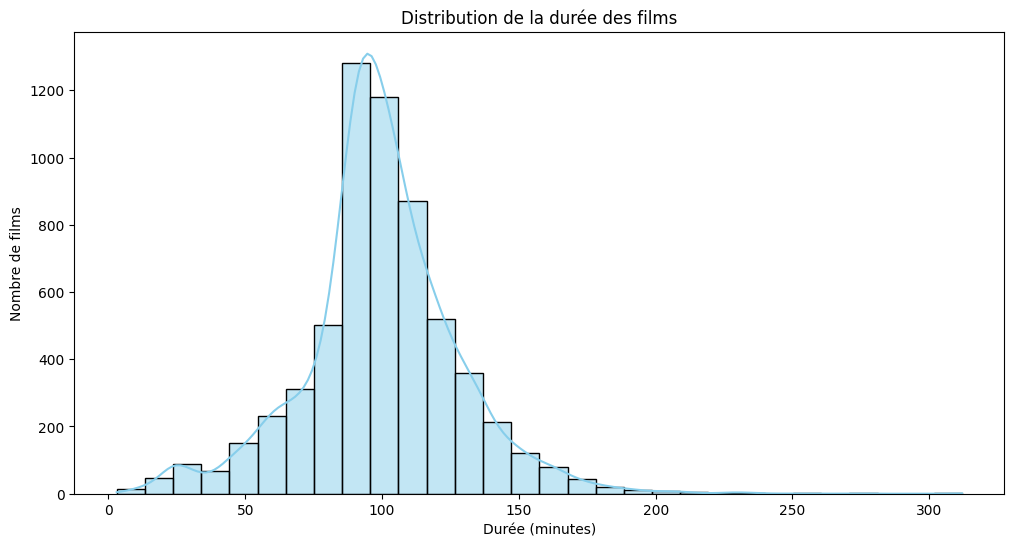

In [27]:

# Filtrer les films
movies = df[df['type'] == 'Movie'].copy()
# Extraire la durée en minutes (supprimer ' min' et convertir en int)
movies['duration_min'] = movies['duration'].str.replace(' min', '').astype(float)

plt.figure(figsize=(12, 6))
sns.histplot(movies['duration_min'].dropna(), bins=30, kde=True, color='skyblue')
plt.title('Distribution de la durée des films')
plt.xlabel('Durée (minutes)')
plt.ylabel('Nombre de films')
plt.show()



## Distribution des classifications (Ratings)


C:\Users\matos\AppData\Local\Temp\ipykernel_26216\2788890425.py:7: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




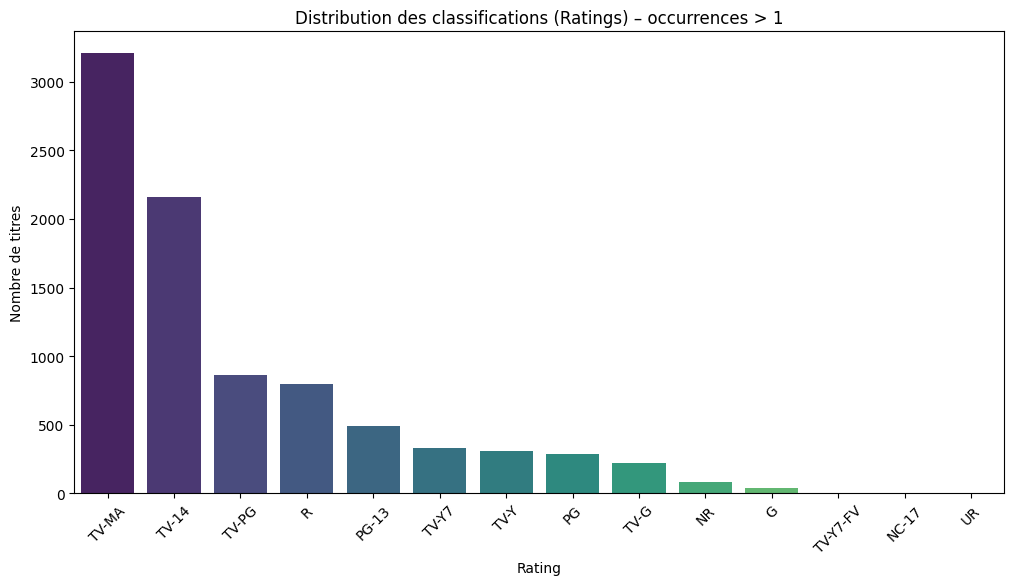

In [ ]:

rating_counts = df['rating'].value_counts()
ratings_gt1 = rating_counts[rating_counts > 1].index

# Tracer seulement ces catégories
plt.figure(figsize=(12, 6))
sns.countplot(
    data=df[df['rating'].isin(ratings_gt1)],
    x='rating',
    order=ratings_gt1,
    palette='viridis'
)

plt.title('Distribution des classifications (Ratings) – occurrences > 1')
plt.xlabel('Rating')
plt.ylabel('Nombre de titres')
plt.xticks(rotation=45)
plt.show()


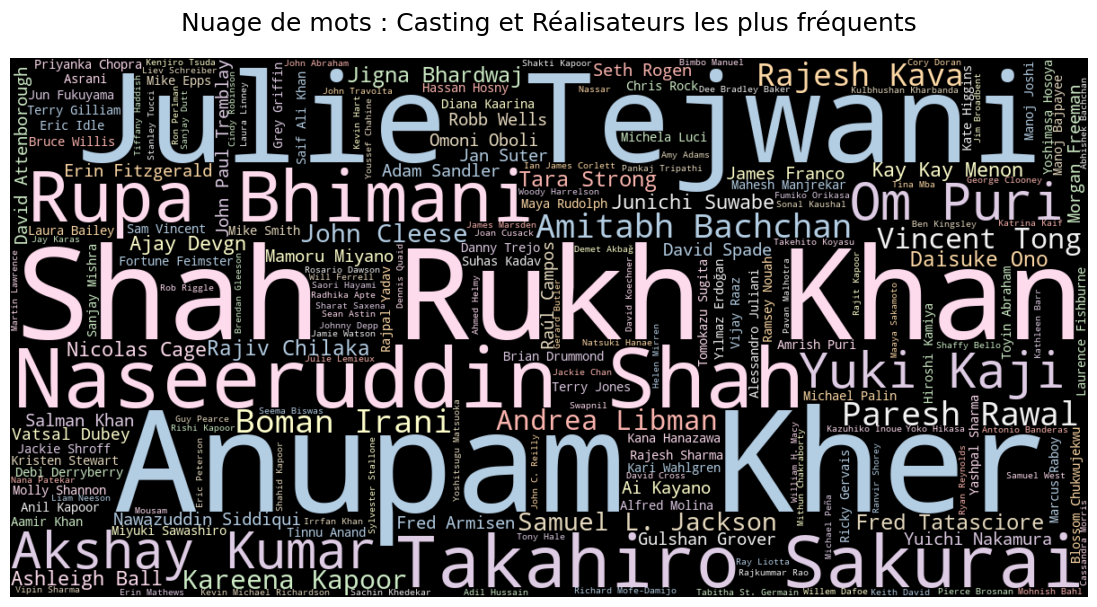

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from collections import Counter
import pandas as pd

# sépare les listes de noms (séparés par des virgules) et on "explose" pour avoir un nom par ligne.
all_names = pd.concat([df['cast'], df['director']]).dropna().str.split(', ').explode()

name_counts = Counter(all_names)

wordcloud = WordCloud(width=1200, height=600, background_color='black', colormap='Pastel1').generate_from_frequencies(name_counts)

plt.figure(figsize=(14, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # On retire les axes pour l'esthétique
plt.title("Nuage de mots : Casting et Réalisateurs les plus fréquents", fontsize=18, pad=20)
plt.show()